In [1]:
%reload_ext autoreload
%autoreload 2

import time
from tqdm import tqdm
import numpy as np
import scipy as sp
import torch
import torch.nn.functional as F
from torch import nn
from torchvision.transforms import v2 as transforms

from matplotlib import pyplot as plt

from networkAlignmentAnalysis.models.models import MLP, CNN2P2, AlexNet
from networkAlignmentAnalysis import utils
from networkAlignmentAnalysis import datasets
from networkAlignmentAnalysis import files

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using device: ', DEVICE)

using device:  cuda


In [ ]:
# TODO
# 1.1. include additional AlignmentModel methods stored in extra class in base model
# -- the measure_eigenfeature method is baaaaad -- because it doesn't account for convolutional layers

# I should also break apart the measure_eigenfeatures method for better parameter handling
# and also to allow use of components of the method in other contexts

# 2. Make CIFAR class
# 4. Rewrite existing analysis pipelines
# 5. SLURM!!!!

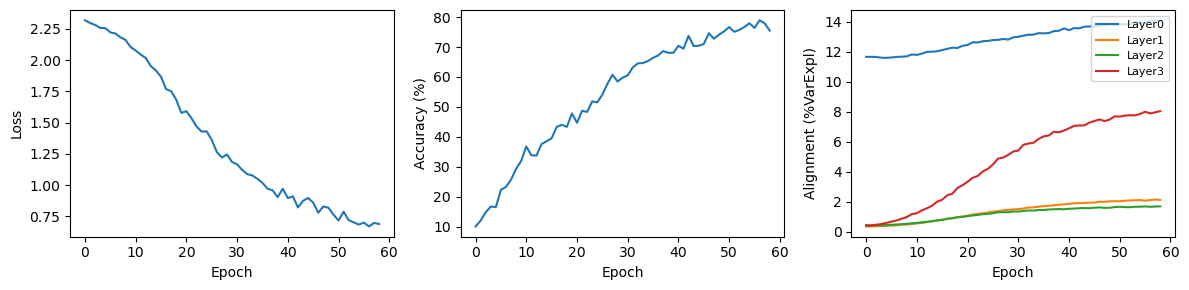

In [4]:
# This code plots absolute values of loss, accuracy, similarity, and integration
# -- useful for knowing what the true (unnormalized) values are --
numEpoch = trackLoss.shape[0]
alignMean = utils.avg_from_full(alignFull)

# Note: similarity and integration are only current -- I changed it to simMean,intMean,simStd,intStd for future reference and for plotting error bars!
fig,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].plot(trackLoss)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(trackAccuracy)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy (%)')
for i in range(alignMean.shape[0]):
    ax[2].plot(alignMean[i,:]*100,label=f'Layer{i}')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Alignment (%VarExpl)')
ax[2].legend(fontsize=8, loc='upper right')

plt.tight_layout()